## CRISP-DM 
### Cross-Industry Standard Process for Data Mining

### Stages of Crisp-DM
1. Business Understanding(бизнесс-анализ/ понимание данных)
2. Data Understanding(изучение данных)
3. Data Preparation(подготовка данных)
4. Modeling(моделирование)
5. Evaluation(оценка)
6. Deployment(внедрение)

#### Задание:
* взять задачу с винами и решить ее,оформив в виде CrispDM подхода
* https://www.kaggle.com/rajyellow46/wine-quality

### 1. Business Understanding(бизнесс-анализ/ понимание данных)

### 1.1.Цель
Моделирование предпочтений вин разными способами путем извлечения данных из физико-химических свойств

### 1.2. Описание
Эти два набора данных относятся к красному и белому вариантам португальского вина "Винью Верде". Ссылка [Cortez et al., 2009]. Из-за проблем с конфиденциальностью и логистики доступны только физико-химические (исходные данные) и сенсорные (выходные данные) переменные (например, нет данных о сортах винограда, марке вина, продажной цене вина и т. Д.).

Эти наборы данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и не сбалансированы (например, нормальных вин едят больше, чем отличных или плохих). Алгоритмы обнаружения выбросов могут использоваться для обнаружения нескольких отличных или плохих вин. Кроме того, мы не уверены, все ли входные переменные актуальны. Так что было бы интересно протестировать методы выбора функций.

Два набора данных были объединены, и несколько значений были удалены случайным образом.

### 2.Data Understanding(изучение данных)

### 2.1. Импорт библиотек

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Modelling Helpers
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, precision_score, recall_score, accuracy_score

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline

### 2.2. Загрузка данных

In [4]:
df_wine =  pd.read_csv('HW_task/ZAK/02Методология_ведения/winequalityN.csv')

### 2.3. Статистика и визуализации

In [5]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


#### Описание переменных
1. fixed acidity -фиксированная кислотность
2.  volatile acidity - летучая кислотность
3. citric acid - лимонная кислота
4.  residual sugar - остаточный сахар
5.  chlorides - хлориды
6.  free sulfur dioxide - свободный диоксид серы
7.  total sulfur dioxide - диоксид серы общий
8.  density - плотность
9.  pH - кислотность
10. sulphates - сульфаты
11. alcohol - алкоголь
* Output variable (based on sensory data):
12.  quality (score between 0 and 10) - оценка от 0 до 10

In [13]:
df_wine.shape

(6497, 13)

In [14]:
df_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### 2.4. Информация о переменных

In [15]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


* есть различия в значениях count ,что говорит о наличии пропущенных значений
* volatile acidity(летучая кислотность) и citric acid(лимонная кислота)имеют одинаковый диапозон от 0,3 до 1,6
* большой размах между 75% и max :residual sugar(остаточный сахар)  
                                  free sulfur dioxide(свободный диоксид серы)
                                  total sulfur dioxide(диоксид серы общий)
                                  sulphates(сульфаты)
* density (плотность) - практически неизменный параметр
* средняя оценка качества 5,81

#### 2.4.1 Проверка пропущенных значений

In [7]:
df_wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

#### С учетом наличия незначительного количества пропущенных значений - удаляю их

In [8]:
df = df_wine.dropna()
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### 2.5. Распределение данных

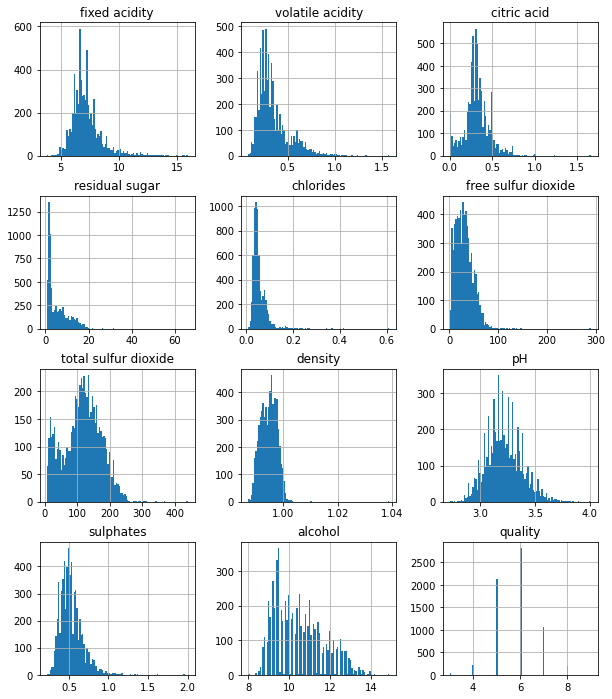

<Figure size 432x288 with 0 Axes>

In [15]:
df.hist(bins = 100, figsize = (10,12))
plt.show()
plt.tight_layout()

#### 2.6. Строю тепловую карту корреляции для понимания важности и использования необходимых параметров

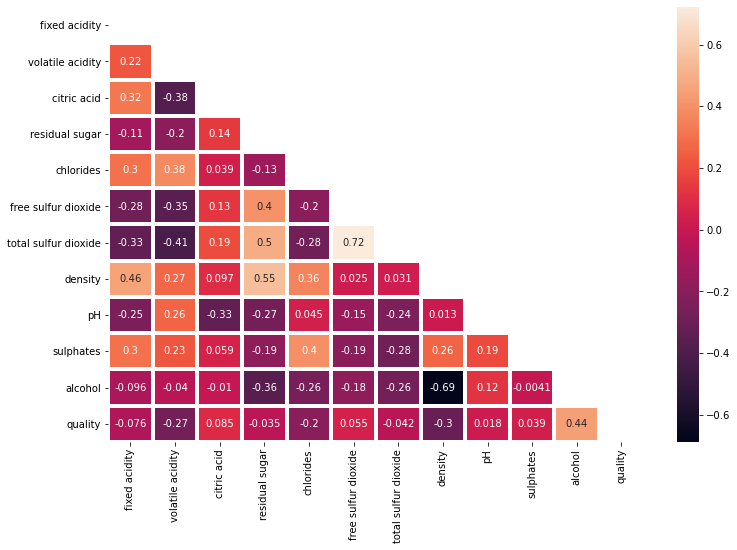

In [35]:
plt.figure(figsize=(12, 8))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, linewidths=3, linecolor='w',mask=matrix)
plt.show()

#### Целевая переменная "quality" высоко( 0,44) кореллирует с содержанием алкоголя 

#### 2.7.Взаимосвязь данных

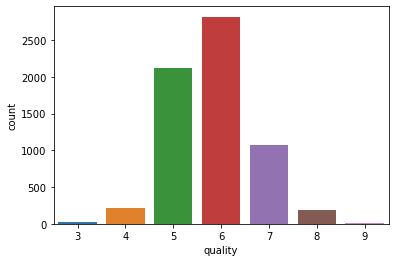

In [16]:
sns.countplot(df['quality'])
plt.show()

In [37]:
df["type"].value_counts()

white    4870
red      1593
Name: type, dtype: int64

In [38]:
df["quality"].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

In [27]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=3 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

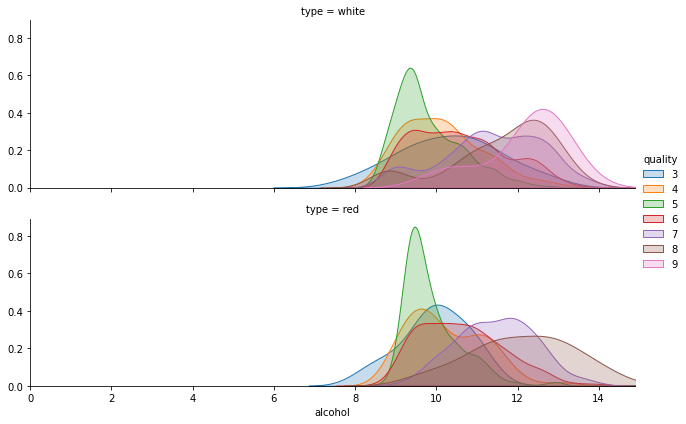

In [28]:
plot_distribution( df , var = 'alcohol' , target = 'quality' , row = 'type' )

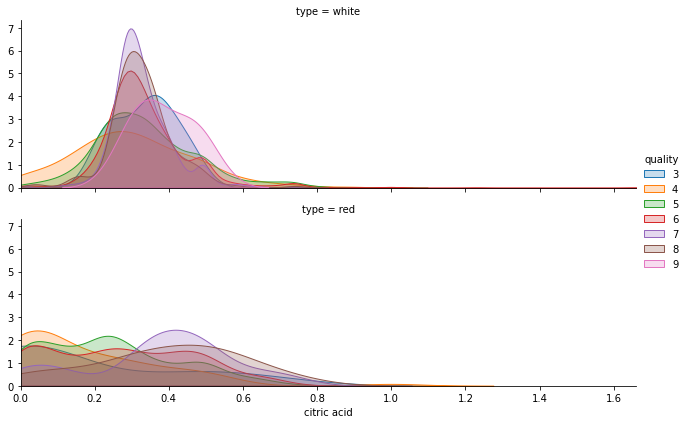

In [31]:
plot_distribution( df , var = 'citric acid' , target = 'quality' , row = 'type' )

In [32]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

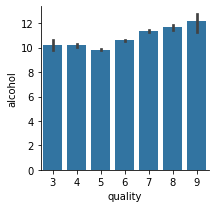

In [44]:
plot_categories( df , cat = 'quality' , target = 'alcohol' )

### 3. Data Preparation(подготовка данных)

#### 3.1 Категориальные переменные преобразовую в числовые переменные

In [57]:
# 1- white wine, 2 - red wine
df_dum = pd.get_dummies(df,drop_first=True)

In [58]:
df_dum

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


#### 3.2 Провожу нормализацию данных из-за большого размаха данных

In [59]:
norm = MinMaxScaler()
norm_fit = norm.fit(df_dum)
df_scaled = norm_fit.transform(df_dum)
print(df_scaled)

[[0.26446281 0.12666667 0.21686747 ... 0.11594203 0.5        1.        ]
 [0.20661157 0.14666667 0.20481928 ... 0.2173913  0.5        1.        ]
 [0.3553719  0.13333333 0.24096386 ... 0.30434783 0.5        1.        ]
 ...
 [0.20661157 0.28666667 0.07831325 ... 0.43478261 0.5        0.        ]
 [0.17355372 0.37666667 0.07228916 ... 0.31884058 0.33333333 0.        ]
 [0.18181818 0.15333333 0.28313253 ... 0.43478261 0.5        0.        ]]


In [71]:
# create new df
df_new = pd.DataFrame(df_scaled,
                      columns=[
                          'fixed acidity', 'volatile acidity', 'citric acid',
                          'residual sugar', 'chlorides', 'free sulfur dioxide',
                          "total sulfur dioxide",'density', 'pH', 'sulphates', 
                          'alcohol', 'quality','type_wine'
                      ])

In [74]:
df_new.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_wine
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,0.282459,0.173059,0.192023,0.074294,0.078166,0.102489,0.252752,0.146283,0.386304,0.174803,0.361279,0.469751,0.753520
std,0.107266,0.109759,0.087501,0.072958,0.058265,0.061663,0.130246,0.057865,0.124535,0.083659,0.172917,0.145548,0.430995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.163594,0.100636,0.302326,0.117978,0.217391,0.333333,1.000000
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333,0.500000,1.000000
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190669,0.465116,0.213483,0.478261,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4. Modeling(моделирование)

#### 4.1 Выбор модели - логистическая регрессия.

In [87]:
model_lr = LogisticRegression()

#### 4.1.2 Разивка данных и обучение

In [76]:
x = df_new.drop(['quality', 'type_wine'], axis=1)
y = df_new['type_wine']

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [91]:
model_lr.fit(X_train, y_train)

LogisticRegression()

#### 4.2 Выбор модели - Random Forest Classifier.

In [88]:
model_rf = RandomForestClassifier(random_state = 1)

#### 4.2.2 Обучение

In [89]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### 5. Evaluation(оценка)

#### 5.1 Logistic Regression

In [78]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

In [83]:
score = accuracy_score(y_test, y_pred)
score

0.9896854048478597

In [79]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 466,   11],
       [   9, 1453]], dtype=int64)

In [80]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       477
         1.0       0.99      0.99      0.99      1462

    accuracy                           0.99      1939
   macro avg       0.99      0.99      0.99      1939
weighted avg       0.99      0.99      0.99      1939



In [86]:
log = pd.DataFrame(columns=["model", "accuracy"])
log = log.append({"model": "logistic regression", "accuracy": score}, ignore_index=True)
log

,model,accuracy
0,logistic regression,0.989685


#### 5.2 Random Forest Classifier

In [93]:
y_pred_rf = model_rf.predict(X_test)

In [94]:
cr = classification_report(y_test, y_pred_rf)
print(cr)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       477
         1.0       0.99      1.00      1.00      1462

    accuracy                           0.99      1939
   macro avg       0.99      0.99      0.99      1939
weighted avg       0.99      0.99      0.99      1939



In [96]:
score = accuracy_score(y_test, y_pred_rf)
score

0.9943269726663229

### 6. Deployment(внедрение)
Публикация полученного прогноза в таблицу лидеров Kaggle.

In [97]:
log = log.append({"model": "Random Forest", "accuracy": score}, ignore_index=True)
log

,model,accuracy
0,logistic regression,0.989685
1,Random Forest,0.994327


#### Обе модели дают хороший результат предсказания